In [ ]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)


In [ ]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [ ]:
u @ u.T.conjugate() # u is unitary. Its columns are left singularvectors

array([[ 1.+0.j, -0.+0.j, -0.+0.j,  0.-0.j],
       [-0.-0.j,  1.+0.j,  0.+0.j, -0.+0.j],
       [-0.-0.j,  0.-0.j,  1.+0.j, -0.+0.j],
       [ 0.+0.j, -0.-0.j, -0.-0.j,  1.+0.j]])

In [ ]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors


array([[ 1.+0.j, -0.+0.j,  0.+0.j, -0.+0.j,  0.-0.j],
       [-0.-0.j,  1.+0.j,  0.-0.j,  0.-0.j, -0.-0.j],
       [ 0.-0.j,  0.+0.j,  1.+0.j,  0.-0.j, -0.-0.j],
       [-0.-0.j,  0.+0.j,  0.+0.j,  1.+0.j, -0.-0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  1.+0.j]])

In [ ]:
s # Only the diagonal entries of Sigma are returned in s

array([3.138, 1.126, 0.67 , 0.496])

In [ ]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [ ]:
np.outer(u[0, :], vh[0, :])

array([[0.155, 0.247, 0.205, 0.336, 0.186],
       [0.004, 0.006, 0.005, 0.008, 0.005],
       [0.129, 0.206, 0.171, 0.28 , 0.155],
       [0.216, 0.345, 0.287, 0.468, 0.259]])

In [ ]:
ar = np.zeros_like(a)
for i in range(4):
  ar += np.outer(u[:, i], s[i] * vh[i, :])

In [ ]:
a -ar # a and ar are identical

array([[-0., -0., -0., -0., -0.],
       [ 0.,  0., -0.,  0., -0.],
       [ 0.,  0., -0.,  0., -0.],
       [-0., -0.,  0.,  0.,  0.]])

In [ ]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

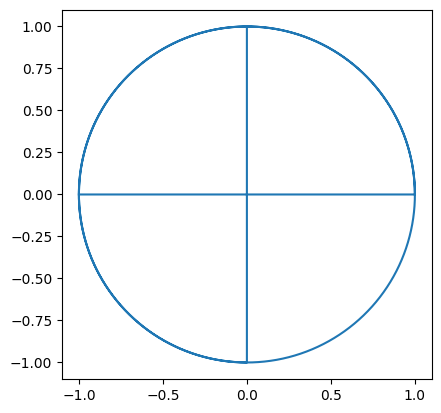

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def show(c):
  plt.plot(c[0, :], c[1, :])
  plt.axis('image');
# plot the unit circle and axis segments:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]), np.concatenate([z, np.sin(t), l])])
show(c)

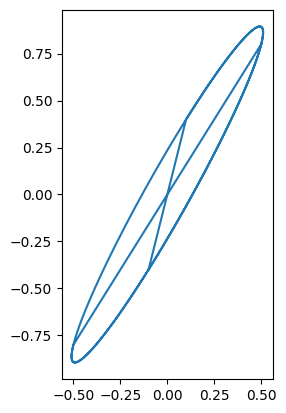

In [ ]:
show(a @ c)

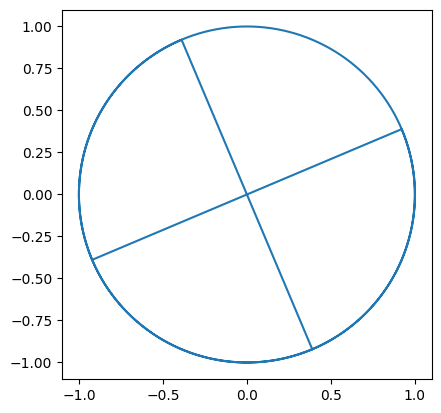

In [ ]:
show(vh @ c)

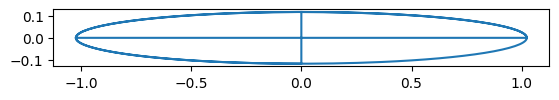

In [ ]:
show(np.diag(s) @ c)

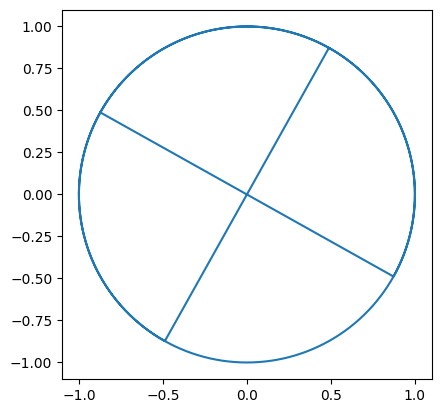

In [ ]:
show(u@c)

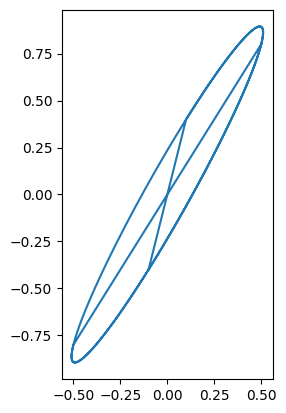

In [ ]:
show(u @ np.diag(s) @ vh @ c)

In [ ]:
cats = plt.imread('../content/GeoLea.png')
cats.shape

(1040, 758, 4)

In [ ]:
np.linalg.norm(cats[..., 0] -cats[..., 2], 'fro')

0.0

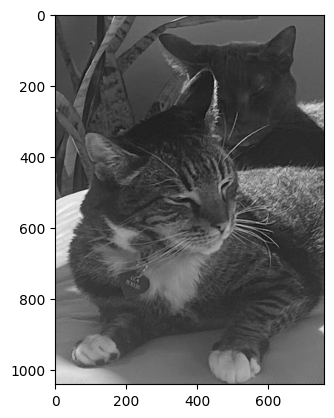

In [ ]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');


In [ ]:
u, s, vh = svd(c)

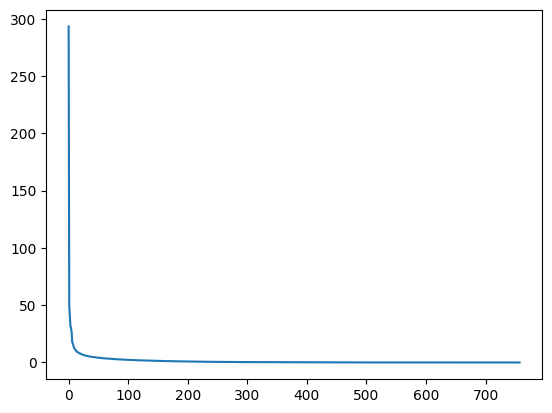

In [ ]:
plt.plot(s);

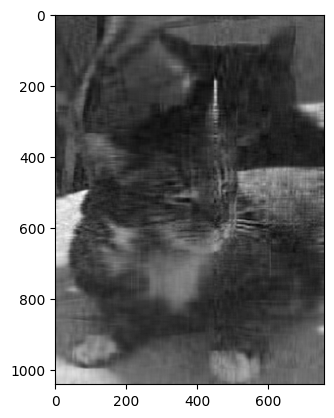

In [ ]:
# Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

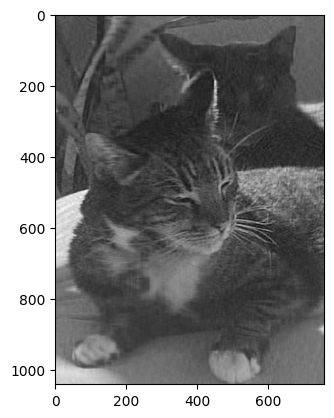

In [ ]:
# Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [ ]:
relative_error = 1.e-1

In [ ]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total -np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

41

In [ ]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [ ]:
np.linalg.norm(c -cl, 'fro') / np.linalg.norm(c, 'fro')

0.09942441

In [ ]:
u.shape[0] * l + l + l * vh.shape[0]

73759

In [ ]:
c.shape[0] * c.shape[1]

788320